In [0]:
!pip install PyGithub

In [0]:
import pandas as pd
import numpy as np
import calendar
import time
import sys
from github import Github
from tqdm import tqdm
import matplotlib.pyplot as plt

In [0]:
def checkAndWait(github_yd):
  if github_yd.rate_limiting[0] <= 5:
    core_rate_limit = github_yd.get_rate_limit().core
    reset_timestamp = calendar.timegm(core_rate_limit.reset.timetuple())
    sleep_time = reset_timestamp - calendar.timegm(time.gmtime()) + 5  # add 5 seconds to be sure the rate limit has been reset
    for remaining in range(sleep_time, 0, -1):
      sys.stdout.write("\r")
      sys.stdout.write("{:2d} seconds remaining.".format(remaining))
      sys.stdout.flush()
      time.sleep(1)
    sys.stdout.write("\rAPI limit refreshed!            \n")

In [0]:
yd_token = 'cf2fec994c72360455f2a71acdb790ddd6b07049'
github_yd = Github(yd_token)
checkAndWait(github_yd)
repo = github_yd.get_repo('twbs/bootstrap')
issues = repo.get_issues(state = 'closed')

In [0]:
events_list = []
for issue in tqdm(issues):
  events_list.append(issue.get_events())
  checkAndWait(github_yd)
print(len(events_list))

29757it [08:47, 56.36it/s]

29757


In [6]:
smell_count = 0
for events in tqdm(events_list):
  closed = False
  for event in events:
    checkAndWait(github_yd)
    if event.event == "closed":
      closed = True
    elif event.event == "reopened":
      closed = False
    elif closed and event.event == "merged":
      smell_count += 1
      break
print(smell_count)

  9%|▉         | 2677/29757 [05:53<1:08:47,  6.56it/s]

API limit refreshed!            
API limit refreshed!            
API limit refreshed!            
 1 seconds remaining.

  9%|▉         | 2679/29757 [42:05<3431:17:39, 456.19s/it]

API limit refreshed!            


 25%|██▌       | 7560/29757 [52:39<46:32,  7.95it/s]

API limit refreshed!            
API limit refreshed!            
API limit refreshed!            
API limit refreshed!            
 1 seconds remaining.

 25%|██▌       | 7563/29757 [1:42:36<1940:58:09, 314.84s/it]

API limit refreshed!            


 42%|████▏     | 12491/29757 [1:53:20<40:21,  7.13it/s]

API limit refreshed!            
API limit refreshed!            
API limit refreshed!            
API limit refreshed!            
 1 seconds remaining.

 42%|████▏     | 12493/29757 [3:43:15<6641:51:47, 1385.00s/it]

API limit refreshed!            


 58%|█████▊    | 17389/29757 [3:54:14<27:58,  7.37it/s]

 1 seconds remaining.

 58%|█████▊    | 17392/29757 [4:43:26<1064:42:12, 309.98s/it]

API limit refreshed!            


 75%|███████▌  | 22343/29757 [4:53:18<14:07,  8.74it/s]

 1 seconds remaining.

 75%|███████▌  | 22345/29757 [5:43:37<1305:34:44, 634.12s/it]

API limit refreshed!            


 92%|█████████▏| 27247/29757 [5:53:10<05:14,  7.98it/s]

API limit refreshed!            
API limit refreshed!            
 1 seconds remaining.

 92%|█████████▏| 27249/29757 [6:43:58<445:53:50, 640.04s/it]

API limit refreshed!            


100%|██████████| 29757/29757 [6:49:56<00:00,  1.21it/s]

14


<BarContainer object of 2 artists>

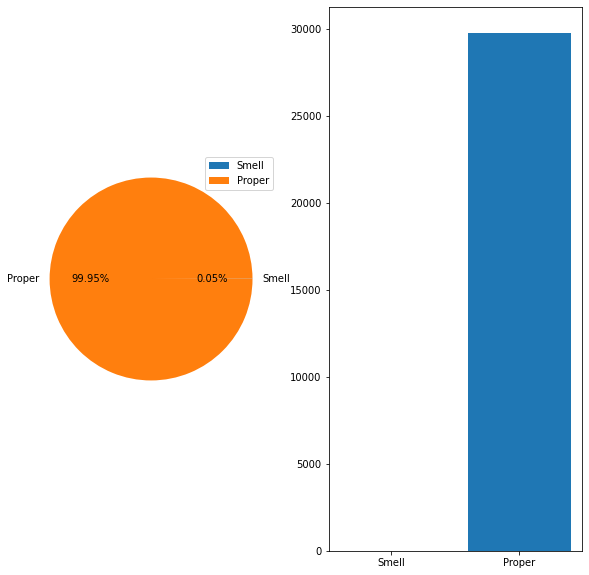

In [7]:
smell_percentage = 100 * (smell_count / len(events_list))
data = [smell_percentage, 100 - smell_percentage]
label = ['Smell', 'Proper']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,10))
ax1.pie(data, labels = label, autopct = '%1.2f%%')
ax1.legend()
ax2.bar(label, [smell_count, len(events_list) - smell_count])